In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras.activations,keras.losses
from keras.models import  Sequential
from keras.layers import Dense
from imblearn.over_sampling import RandomOverSampler


In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


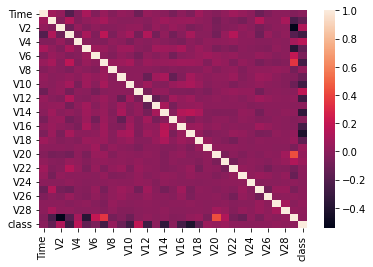

In [3]:
sn.heatmap(data.corr())
plt.show()

C:\Users\Surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


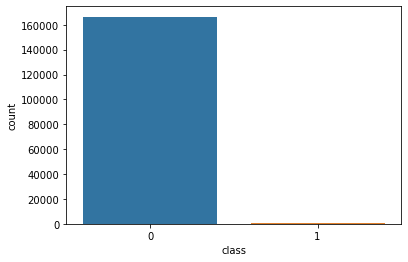

In [4]:
sn.countplot(data['class'])
plt.show()

C:\Users\Surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


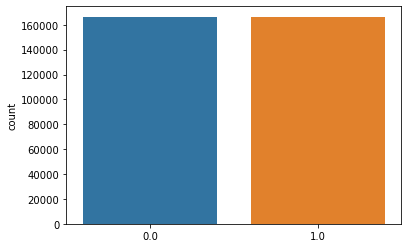

In [5]:
oversample = RandomOverSampler(sampling_strategy='minority')

stand=MinMaxScaler()

x=data.iloc[:,1:29].values
y=data['class'].values

x=stand.fit_transform(x)
y=pd.DataFrame(y)
y=stand.fit_transform(y)

x,y = oversample.fit_resample(x,y)
sn.countplot(y)
plt.show()

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25)

model=Sequential()
model.add(Dense(units=x_train.shape[1],
                activation=keras.activations.sigmoid))
model.add(Dense(32,activation=keras.activations.sigmoid))
model.add(Dense(units=1,
                activation=keras.activations.sigmoid))

model.compile(optimizer='adam',
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [7]:
model.fit(x_train,y_train,batch_size=20,epochs=25)

Epoch 1/25
4162/4162 [==============================] - 7s 1ms/step - loss: 0.2400 - accuracy: 0.9121
Epoch 2/25
4162/4162 [==============================] - 6s 1ms/step - loss: 0.1552 - accuracy: 0.9418
Epoch 3/25
4162/4162 [==============================] - 6s 1ms/step - loss: 0.1490 - accuracy: 0.9436
Epoch 4/25
4162/4162 [==============================] - 6s 1ms/step - loss: 0.1468 - accuracy: 0.9450
Epoch 5/25
4162/4162 [==============================] - 6s 1ms/step - loss: 0.1455 - accuracy: 0.9465
Epoch 6/25
4162/4162 [==============================] - 6s 1ms/step - loss: 0.1446 - accuracy: 0.9469
Epoch 7/25
4162/4162 [==============================] - 6s 1ms/step - loss: 0.1441 - accuracy: 0.9473
Epoch 8/25
4162/4162 [==============================] - 6s 1ms/step - loss: 0.1429 - accuracy: 0.9476
Epoch 9/25
4162/4162 [==============================] - 6s 1ms/step - loss: 0.1421 - accuracy: 0.9477
Epoch 10/25
4162/4162 [==============================] - 6s 1ms/step - loss: 0.142

In [8]:
pred = model.predict(x_test)
ev = model.evaluate(x_test,y_test)
print("Loss : ",round(ev[0],4))
print("Accuracy : ",round(ev[1]*100,4),"%")

7804/7804 [==============================] - 9s 1ms/step - loss: 0.1382 - accuracy: 0.9467
Loss :  0.1382
Accuracy :  94.6662 %


In [9]:
y_pred = []
for x in pred:
    y_pred.append(x>0.5)

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[122391,   2422],
       [ 10897, 114001]], dtype=int64)